from google.colab import drive
drive.mount('/content/drive')

In [1054]:
import pandas as pd

In [1055]:
df = pd.read_csv('../data/obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [1056]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [1057]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [1058]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
#Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical columns : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [1059]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['family_history_with_overweight']=le.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = le.fit_transform(df['FAVC'])
df['CAEC'] = le.fit_transform(df['CAEC'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])
df['SCC']= le.fit_transform(df['SCC'])
df['CALC'] = le.fit_transform(df['CALC'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])
df['NObeyesdad'] = df['NObeyesdad'].replace(
    {"Insufficient_Weight":0, "Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,
     "Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_19400\3136844729.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NObeyesdad'] = df['NObeyesdad'].replace(


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,2
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,6
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,6
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,6
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,6


In [1060]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.dropna()
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,26,1.58,105.06,1,1,3.00,3.00,2,0,1.20,0,0.00,0.535,2,3,6
1,1,28,1.82,120.82,1,1,2.97,3.00,2,0,2.81,0,0.98,1.192,2,3,5
2,1,31,1.78,120.61,1,1,2.34,3.00,2,0,2.30,0,0.57,0.922,2,0,5
3,0,37,1.55,76.08,1,1,2.00,2.77,2,0,1.55,0,1.35,0.000,2,0,4
4,1,18,1.79,51.52,0,1,2.92,3.00,2,0,1.78,0,1.08,1.000,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,35,1.78,105.00,1,1,3.00,1.00,3,0,3.00,0,3.00,1.000,1,0,4
2107,1,38,1.70,78.00,0,1,3.00,3.00,1,0,2.00,0,0.00,0.000,1,0,3
2108,1,21,1.62,70.00,0,1,2.00,1.00,3,0,3.00,0,1.00,0.000,2,3,2
2109,0,26,1.64,111.93,1,1,3.00,3.00,2,0,2.68,0,0.00,0.082,2,3,6


In [1061]:
df.to_csv('../data/obesity_encoded.csv', index=False)

In [1062]:
df1 = pd.read_csv('../data/obesity_encoded.csv')
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,26,1.58,105.06,1,1,3.00,3.00,2,0,1.20,0,0.00,0.535,2,3,6
1,1,28,1.82,120.82,1,1,2.97,3.00,2,0,2.81,0,0.98,1.192,2,3,5
2,1,31,1.78,120.61,1,1,2.34,3.00,2,0,2.30,0,0.57,0.922,2,0,5
3,0,37,1.55,76.08,1,1,2.00,2.77,2,0,1.55,0,1.35,0.000,2,0,4
4,1,18,1.79,51.52,0,1,2.92,3.00,2,0,1.78,0,1.08,1.000,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,35,1.78,105.00,1,1,3.00,1.00,3,0,3.00,0,3.00,1.000,1,0,4
2107,1,38,1.70,78.00,0,1,3.00,3.00,1,0,2.00,0,0.00,0.000,1,0,3
2108,1,21,1.62,70.00,0,1,2.00,1.00,3,0,3.00,0,1.00,0.000,2,3,2
2109,0,26,1.64,111.93,1,1,3.00,3.00,2,0,2.68,0,0.00,0.082,2,3,6


In [1063]:
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range=(0,1))
x = df1.drop('NObeyesdad', axis=1)
x = scaler.fit_transform(x)
y = df1['NObeyesdad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x


array([[0.        , 0.25531915, 0.24528302, ..., 0.2675    , 0.66666667,
        0.75      ],
       [1.        , 0.29787234, 0.69811321, ..., 0.596     , 0.66666667,
        0.75      ],
       [1.        , 0.36170213, 0.62264151, ..., 0.461     , 0.66666667,
        0.        ],
       ...,
       [1.        , 0.14893617, 0.32075472, ..., 0.        , 0.66666667,
        0.75      ],
       [0.        , 0.25531915, 0.35849057, ..., 0.041     , 0.66666667,
        0.75      ],
       [0.        , 0.17021277, 0.20754717, ..., 0.        , 1.        ,
        1.        ]], shape=(2111, 16))

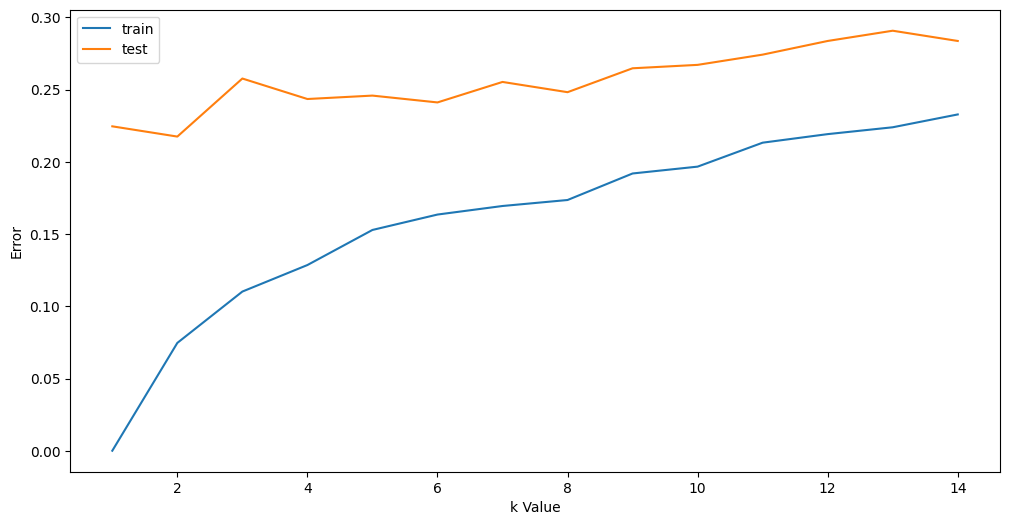

In [1064]:
error1 =[]
error2 =[]
for k in range(1,15):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  y_pred1 = model.predict(x_train)
  error1.append(np.mean(y_pred1 != y_train))
  y_pred2 = model.predict(x_test)
  error2.append(np.mean(y_pred2 != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [1065]:
model = KNeighborsClassifier(n_neighbors=6, weights='distance')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
cv_scores = cross_val_score(model,x_train, y_train,cv=skf, scoring='accuracy')
accuracy = accuracy_score(y_test, y_pred)


print("Cross-validation scores: ", cv_scores)
print("Mean Accuracy: ", np.mean(cv_scores))
print("Standard Deviation: ", np.std(cv_scores))
print("Accuracy: ", accuracy)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Cross-validation scores:  [0.75739645 0.81065089 0.77514793 0.8041543  0.76854599]
Mean Accuracy:  0.7831791126016189
Standard Deviation:  0.02067864015298602
Accuracy:  0.7754137115839244

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78        56
           1       0.57      0.30      0.40        66
           2       0.65      0.68      0.67        47
           3       0.80      0.70      0.75        57
           4       0.74      0.84      0.78        67
           5       0.87      1.00      0.93        58
           6       0.97      1.00      0.99        72

    accuracy                           0.78       423
   macro avg       0.76      0.77      0.76       423
weighted avg       0.76      0.78      0.76       423



In [1066]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=10)
decisionTree.fit(x_train,y_train)
y_pred = decisionTree.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cv_scores = cross_val_score(decisionTree, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Accuracy: 0.9078014184397163

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.90      0.79      0.84        66
           2       0.75      0.85      0.80        47
           3       0.88      0.91      0.90        57
           4       0.98      0.85      0.91        67
           5       0.90      0.98      0.94        58
           6       1.00      1.00      1.00        72

    accuracy                           0.91       423
   macro avg       0.90      0.91      0.90       423
weighted avg       0.91      0.91      0.91       423

Cross-validation scores: [0.93491124 0.9112426  0.93786982 0.95252226 0.89910979]
Mean Accuracy: 0.9271311432233598
Standard Deviation: 0.01927796434825954
